In [11]:
# Import the whisker counter script
import whisker_counter as wc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
# Reload the module 
import importlib
importlib.reload(wc)

<module 'whisker_counter' from 'c:\\Users\\wanglab\\Desktop\\licking-and-spike-analysis\\Whisker_Curation\\whisker_counter.py'>

In [13]:
# Path to your lines.csv file
CSV_PATH = "1027_lines.csv"

# Maximum number of whiskers to analyze
MAX_WHISKERS = 7

In [14]:
# Run the main analysis
result = wc.analyze_whisker_distribution(CSV_PATH, max_whiskers=MAX_WHISKERS, verbose=True)

Analysis of: 1027_lines.csv
Total frames analyzed: 464104

Whisker Distribution:
----------------------------------------
Frames with 1 whisker(s):      0 ( 0.00%)
Frames with 2 whisker(s):     83 ( 0.02%)
Frames with 3 whisker(s):   2411 ( 0.52%)
Frames with 4 whisker(s):  33266 ( 7.17%)
Frames with 5 whisker(s): 388289 (83.66%)
Frames with 6 whisker(s):  31221 ( 6.73%)
Frames with 7 whisker(s):   8426 ( 1.82%)
----------------------------------------


## Calculate Whisker Length

Row Index selects for individual whiskers. Length is calculated as the sum of straight-line distances between consecutive coordinate points along the whisker.

In [15]:
row_index = 400
whisker_data = wc.get_whisker_from_row(CSV_PATH, row_index)

print(f"Whisker Data from Row {row_index}:")
print(f"  Frame: {whisker_data['frame']}")
print(f"  Number of Points: {whisker_data['num_points']}")
print(f"  Total Length: {whisker_data['length']:.2f} pixels")
print(f"  X Coordinates: {whisker_data['x_coords']}")
print(f"  Y Coordinates: {whisker_data['y_coords']}")

Whisker Data from Row 400:
  Frame: 2220
  Number of Points: 4
  Total Length: 99.75 pixels
  X Coordinates: 597.0,546.0,518.9,500.2
  Y Coordinates: 175.8,169.9,162.3,154.5


## Find Shortest Whiskers in Frames with >X Whiskers

Analyze frames that have more than a threshold number of whiskers and find the shortest whisker in each:


Analysis: Frames with MORE than 5 whiskers
Total frames in dataset: 464104
Frames with >5 whiskers: 40055

Shortest Whisker Statistics:
  Mean shortest length: 91.77 pixels
  Median shortest length: 89.71 pixels
  Min shortest length: 49.61 pixels
  Max shortest length: 175.51 pixels
  Std Dev: 22.48 pixels




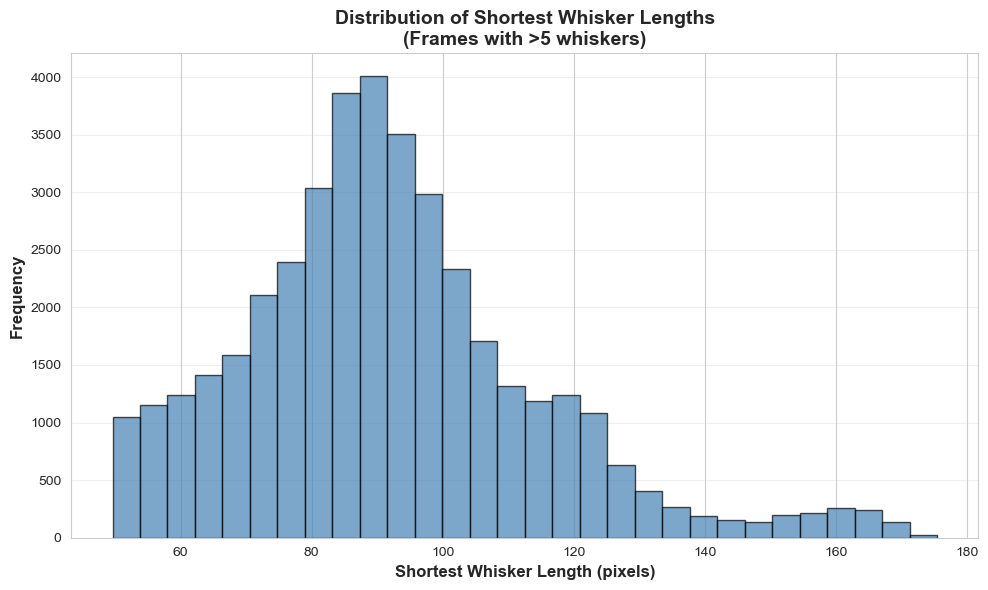


Results Table:


,Frame,Whisker_Count,Shortest_Length,Mean_Length,Longest_Length
2550,4689,6,154.364075,289.450995,481.095626
2594,4733,6,53.500374,251.076675,383.091085
2595,4734,6,58.929725,250.170510,378.653154
2596,4735,6,65.156811,251.056179,373.761421
2597,4736,6,71.338398,252.518842,370.322555
...,...,...,...,...,...
461498,463637,6,86.521871,303.797330,575.408872
461499,463638,6,141.043527,315.468289,572.839341
461608,463747,6,58.012412,313.482120,537.413123
461614,463753,6,65.715182,310.630785,555.202087


In [16]:
# Set threshold for minimum number of whiskers
# For example, if you have 5 real whiskers, frames with >5 have false detections
min_whisker_threshold = 5

# Get results table and plot distribution (all print statements in script)
fig, results_table = wc.plot_shortest_whisker_distribution(CSV_PATH, min_whisker_threshold)

# Display the results table
print("\nResults Table:")
display(results_table)